In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_data_df, city_data_df, on="city", how="left")

merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
total_fare = merge_table["fare"].sum()

urban_df = merge_table[merge_table["type"] == "Urban"]
suburban_df = merge_table[merge_table["type"] == "Suburban"]
rural_df = merge_table[merge_table["type"] == "Rural"]

grouped_urban = urban_df.groupby(["city"])
grouped_suburban = suburban_df.groupby(["city"])
grouped_rural = rural_df.groupby(["city"])

number_rides_urban = urban_df["city"].value_counts()
avarage_fare_urban = grouped_urban["fare"].mean()
total_fare_urban = grouped_urban["fare"].sum()

city_urban_df = pd.DataFrame({"Number Rides":number_rides_urban,
                              "Avarage Fare":avarage_fare_urban,
                              "Total Fare":total_fare_urban})

number_rides_suburban = suburban_df["city"].value_counts()
avarage_fare_suburban = grouped_suburban["fare"].mean()
total_fare_suburban = grouped_suburban["fare"].sum()

city_suburban_df = pd.DataFrame({"Number Rides":number_rides_suburban,
                              "Avarage Fare":avarage_fare_suburban,
                              "Total Fare":total_fare_suburban})

number_rides_rural = rural_df["city"].value_counts()
avarage_fare_rural = grouped_rural["fare"].mean()
total_fare_rural = grouped_rural["fare"].sum()

city_rural_df = pd.DataFrame({"Number Rides":number_rides_rural,
                              "Avarage Fare":avarage_fare_rural,
                              "Total Fare":total_fare_rural})


## Bubble Plot of Ride Sharing Data

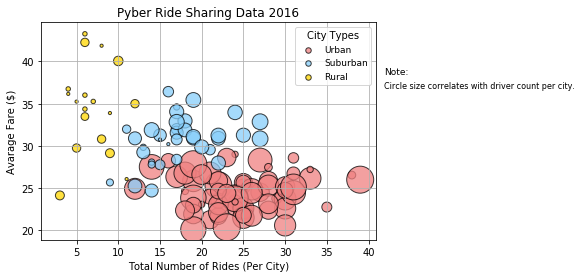

In [25]:
x_axis_urban = city_urban_df["Number Rides"]
y_axis_urban = city_urban_df["Avarage Fare"]
s_urban = urban_df["driver_count"]*10

x_axis_suburban = city_suburban_df["Number Rides"]
y_axis_suburban = city_suburban_df["Avarage Fare"]
s_suburban = suburban_df["driver_count"]*10

x_axis_rural = city_rural_df["Number Rides"]
y_axis_rural = city_rural_df["Avarage Fare"]
s_rural = rural_df["driver_count"]*10

a=plt.scatter(x_axis_urban,y_axis_urban,s=s_urban, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
b=plt.scatter(x_axis_suburban,y_axis_suburban,s=s_suburban, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75)
c=plt.scatter(x_axis_rural,y_axis_rural,s=s_rural, marker="o", facecolors="gold", edgecolors="black", alpha=0.75)

plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avarage Fare ($)")

legend = plt.legend((a, b, c),
                    ('Urban', 'Suburban', 'Rural'),
                    title="City Types",
                    scatterpoints=1,
                    loc='upper right',
                    ncol=1,
                    fontsize=9)

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.gcf().text(0.92, 0.7, "Note:", fontsize=9)
plt.gcf().text(0.92, 0.65, "Circle size correlates with driver count per city.", fontsize=8)


plt.grid()

plt.savefig("../Pyber_Scatter.png")
plt.show()


## Total Fares by City Type

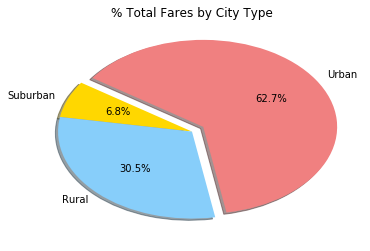

In [4]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

total_fare_urban = urban_df["fare"].sum()
total_fare_suburban = suburban_df["fare"].sum()
total_fare_rural = rural_df["fare"].sum()

sizes = [total_fare_urban, total_fare_rural, total_fare_suburban]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
# Save Figure

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=11800)

plt.title("% Total Fares by City Type")

plt.savefig("../Pyber_Pie_Fare.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

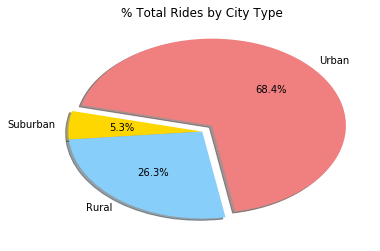

In [6]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

total_rides_urban = urban_df["ride_id"].count()
total_rides_suburban = suburban_df["ride_id"].count()
total_rides_rural = rural_df["ride_id"].count()

sizes = [total_rides_urban, total_rides_rural, total_rides_suburban]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
# Save Figure

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=11800)

plt.title("% Total Rides by City Type")

plt.savefig("../Pyber_Pie_Rides.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

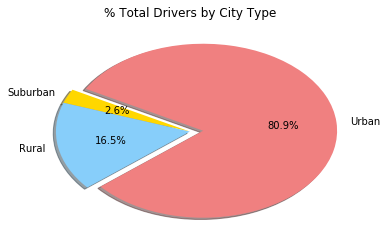

In [8]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

city_data_df_urban = city_data_df[city_data_df["type"] == "Urban"]
city_data_df_suburban = city_data_df[city_data_df["type"] == "Suburban"]
city_data_df_rural = city_data_df[city_data_df["type"] == "Rural"]

total_drivers_urban = city_data_df_urban["driver_count"].sum()
total_drivers_suburban = city_data_df_suburban["driver_count"].sum()
total_drivers_rural = city_data_df_rural["driver_count"].sum()

sizes = [total_drivers_urban, total_drivers_rural, total_drivers_suburban]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)
# Save Figure

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)

plt.title("% Total Drivers by City Type")

plt.savefig("../Pyber_Pie_Drivers.png")

In [9]:
# Show Figure
plt.show()